In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 69s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
import matplotlib.pyplot as plt

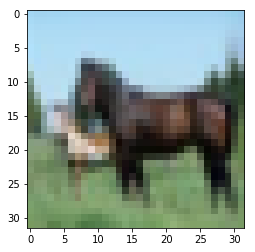

In [14]:
plt.imshow(X_train[12])

In [15]:
X_train.max()

255

In [16]:
X_train = X_train / 255

In [17]:
X_test = X_test/255

In [18]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [20]:
from keras.utils import to_categorical

In [21]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [22]:
from keras.models import Sequential

In [23]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [24]:
model = Sequential()
# Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten out the above two layers so that dense layer can understand that is 2D to 1D
model.add(Flatten())

#Dense layer 128,256,512
model.add(Dense(256,activation = 'relu'))
# Output layer
model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [30]:
model.fit(X_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 92s 2ms/step - loss: 1.5254 - acc: 0.4537
Epoch 2/10
50000/50000 [==============================] - 91s 2ms/step - loss: 1.1943 - acc: 0.5830
Epoch 3/10
50000/50000 [==============================] - 99s 2ms/step - loss: 1.0782 - acc: 0.6298
Epoch 4/10
50000/50000 [==============================] - 89s 2ms/step - loss: 1.0513 - acc: 0.6485
Epoch 5/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.3993 - acc: 0.6295
Epoch 6/10
50000/50000 [==============================] - 86s 2ms/step - loss: 6.9655 - acc: 0.4419
Epoch 7/10
50000/50000 [==============================] - 90s 2ms/step - loss: 10.6185 - acc: 0.3260
Epoch 8/10
50000/50000 [==============================] - 88s 2ms/step - loss: 12.0347 - acc: 0.2490
Epoch 9/10
50000/50000 [==============================] - 91s 2ms/step - loss: 13.4308 - acc: 0.1656
Epoch 10/10
50000/50000 [==============================] - 93s 2ms/step - loss: 12.3993 - acc: 0.

In [34]:
model.metrics_names

['loss', 'acc']

In [35]:
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 7s 720us/step


[11.969127648925781, 0.2566]

In [36]:
from sklearn.metrics import classification_report

In [37]:
predictions = model.predict_classes(X_test)

In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1000
          1       0.30      0.65      0.41      1000
          2       0.55      0.01      0.01      1000
          3       0.00      0.00      0.00      1000
          4       0.21      0.71      0.32      1000
          5       0.44      0.13      0.20      1000
          6       0.00      0.00      0.00      1000
          7       0.79      0.19      0.30      1000
          8       0.23      0.89      0.36      1000
          9       0.00      0.00      0.00      1000

avg / total       0.25      0.26      0.16     10000



C:\Users\brais\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
